# GPT-2

In [33]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sample examples with explanations, predictions and scores

In [34]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "negation"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    stats = pickle.load(f)

print("Size of the dataset:", stats["n_data"])
print("Size of filtered dataset:", stats["n_filtered"])
print("Maximum number of batches:", stats["n_filtered"]//batch_size)

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/home/kamara/syntax-shap/data/negation/negation_gpt2_stats.pkl'

In [8]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            if eval(seed) == seed_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


,input_id,input,explanation,algorithm,n_token
0,651,There was a loud fan in front of,"[4709.0, 4879.0, -4147.0, -3353.0, 49858.0, 51...",partition,8
1,1505,His boat was faster than the rest and Charles ...,"[29217.0, -43243.0, -2491.0, 22289.0, 66338.0,...",partition,12
2,1534,It was midnight and to her surprise she enjoye...,"[-42598.0, -16324.0, 29315.0, -99.0, 52750.0, ...",partition,12
3,87,She tried to stop but,"[-480.0, -398.0, -1928.0, 1294.0, 544.0]",partition,5
4,1957,We were happy to see him but we were sad every...,"[1893.0, 69943.0, 45685.0, 22051.0, 67034.0, 6...",partition,14
...,...,...,...,...,...
7903,139,He decided to buy some,"[0.13519763759917458, 0.09926352865834134, 0.1...",syntax,5
7904,1322,A homeless man walking around the street saw i...,"[-0.054117343243885924, -0.05722753538433914, ...",syntax,11
7905,697,He was thrilled to see the sun was,"[0.061460735659753456, 0.04962989201124059, 0....",syntax,8
7906,2119,He hopes to catch up on the things he missed w...,"[0.004508558959919455, 0.005680784289498513, 0...",syntax,15


In [9]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

,input_id,input,explanation,algorithm,n_token
0,651,There was a loud fan in front of,"[4709.0, 4879.0, -4147.0, -3353.0, 49858.0, 51...",partition,8
1,1505,His boat was faster than the rest and Charles ...,"[29217.0, -43243.0, -2491.0, 22289.0, 66338.0,...",partition,12
2,1534,It was midnight and to her surprise she enjoye...,"[-42598.0, -16324.0, 29315.0, -99.0, 52750.0, ...",partition,12
3,87,She tried to stop but,"[-480.0, -398.0, -1928.0, 1294.0, 544.0]",partition,5
4,1957,We were happy to see him but we were sad every...,"[1893.0, 69943.0, 45685.0, 22051.0, 67034.0, 6...",partition,14
...,...,...,...,...,...
7903,139,He decided to buy some,"[0.13519763759917458, 0.09926352865834134, 0.1...",syntax,5
7904,1322,A homeless man walking around the street saw i...,"[-0.054117343243885924, -0.05722753538433914, ...",syntax,11
7905,697,He was thrilled to see the sun was,"[0.061460735659753456, 0.04962989201124059, 0....",syntax,8
7906,2119,He hopes to catch up on the things he missed w...,"[0.004508558959919455, 0.005680784289498513, 0...",syntax,15


In [10]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(threshold) == threshold_) and (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token
0,0.064883,0.064883,0.064883,-11.080358,0.3,0.669948,1488,He became very anxious and put tons of differe...,partition,12
1,0.039515,0.039515,0.030856,-10.584456,0.0,0.495188,1455,Sam got on and they went into the hills for th...,partition,12
2,0.010980,0.042436,0.067958,-0.979325,0.5,0.563315,1221,She was now stuck with lime green as her new wall,partition,11
3,0.013044,0.005602,0.013044,-0.561141,0.4,0.485089,2107,I found I was able to punt the ball very far a...,partition,15
4,0.744372,0.737913,0.744372,-4.746901,0.2,0.903352,486,Her current car was in really bad,partition,7
...,...,...,...,...,...,...,...,...,...,...
7898,0.032062,-0.034015,0.032062,0.723125,0.1,0.610671,494,He felt a sharp pain in his,syntax,7
7899,0.596255,0.471976,0.682724,-1.175424,0.7,0.284335,1964,I took her to the vet to figure out what was g...,syntax,14
7900,0.722801,0.781863,0.837870,-2.598089,0.2,0.813315,2006,On a day off I took a step that forever change...,syntax,15
7901,0.137971,0.128098,0.137971,-2.637080,0.0,0.734142,633,He noticed an empty field outside of his,syntax,8


In [20]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])
#sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

In [21]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

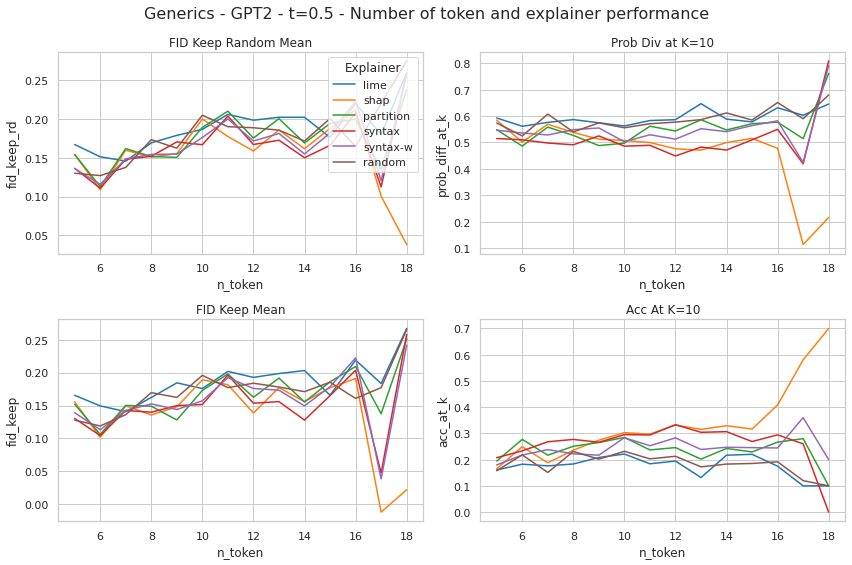

In [12]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Generics - GPT2 - t=0.5 - Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

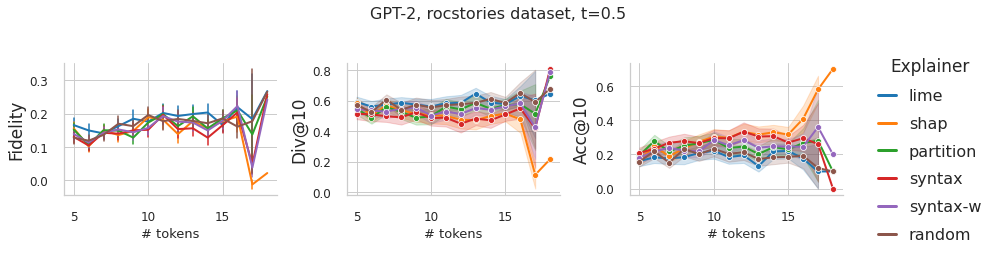

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final_single_threshold#.groupby(['algorithm']).reset_index()#.mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)


fig, axes = plt.subplots(1, 3, figsize=(14,3.5))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=palette, linewidth=2, errorbar='se', err_style='bars')
axes[0].set_title('')
axes[0].set_xlabel('# tokens', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=palette, linewidth=2, markers=True, marker='o')
axes[1].set_title('')
axes[1].set_xlabel('# tokens', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=palette, linewidth=2, markers=True, marker='o')
axes[2].set_title('')
axes[2].set_xlabel('# tokens', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
legend = axes[2].legend(title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.15), fontsize=16, frameon=False, handlelength=1.1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(3)  # Increase line width in legend

fig.suptitle(f'GPT-2, {dataset} dataset, t={threshold_}', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/n_token_vs_perf_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)


### Performance at Thresholds

In [35]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,n_token,threshold
0,0.004442,0.006617,0.031110,-0.183217,0.9,0.019200,491,A guitar has,partition,3,0.8
1,0.006873,0.006873,0.006873,-8.835484,0.7,0.037705,511,An orange has,partition,3,0.8
2,0.043906,0.195921,0.451770,-0.541463,0.3,0.251917,154,Portland is not located in,partition,5,0.8
3,0.062885,0.062885,0.062885,-11.049074,0.0,0.448292,238,A wolf has no,partition,4,0.8
4,0.045772,0.036704,0.045772,-1.618859,0.4,0.195741,361,Maria is a uncle with a,partition,6,0.8
...,...,...,...,...,...,...,...,...,...,...,...
19759,0.206311,0.209579,0.368532,-0.760850,0.4,0.161970,188,A tiger walks without,syntax,4,0.5
19760,0.162948,0.096846,0.289500,-0.407260,0.3,0.609437,490,A guitar does not have,syntax,5,0.5
19761,0.039090,0.039090,-0.034396,-10.573648,0.1,0.480150,428,Kate is a bride without a,syntax,6,0.5
19762,0.010264,0.010264,-0.044371,-9.236538,0.3,0.135687,7,A sister is a,syntax,4,0.5


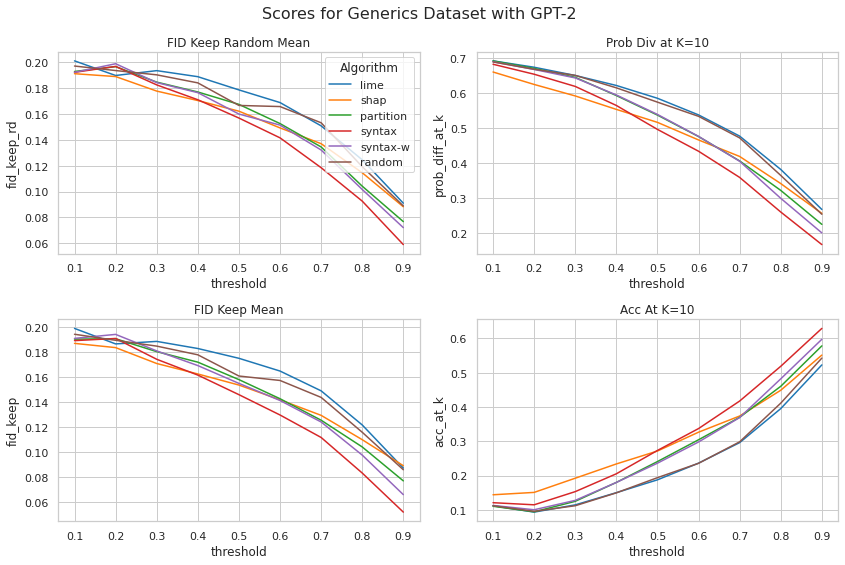

In [31]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w", "random"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Algorithm', loc='upper right')

fig.suptitle('Scores for Generics Dataset with GPT-2', fontsize=16)

plt.tight_layout()
plt.show()


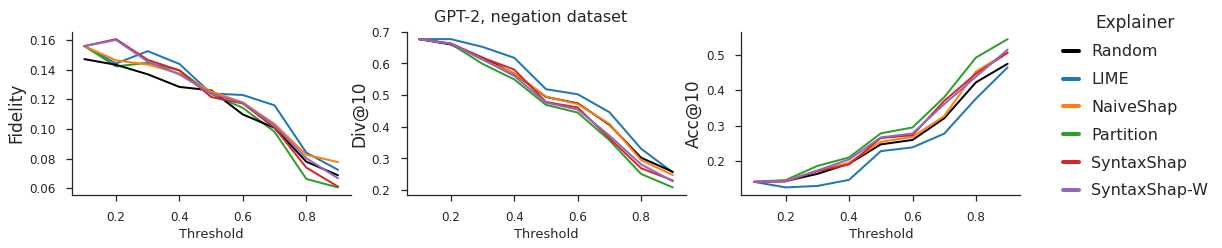

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.2), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf", bbox_inches='tight', dpi=600)
